In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
from tabulate import tabulate

**<span style="font-size: 100%;"> Q1) Reproducing Figures</span>**

**<span style="font-size: 95%;"> Fig. 6.5</span>**

In [2]:
a = 16807
m = 2**31 - 1
seed = 1234
num_points = 1000

In [3]:
def linear_congruence(seed, a, m, num_points):
    xn = []
    for _ in range(num_points):
        seed = (a * seed) % m
        xn.append(seed / m)
    return xn

In [4]:
sequence = linear_congruence(seed, a, m, num_points)
sorted_sequence = np.sort(sequence)
expected_quantiles = np.linspace(0, 1000, num_points)

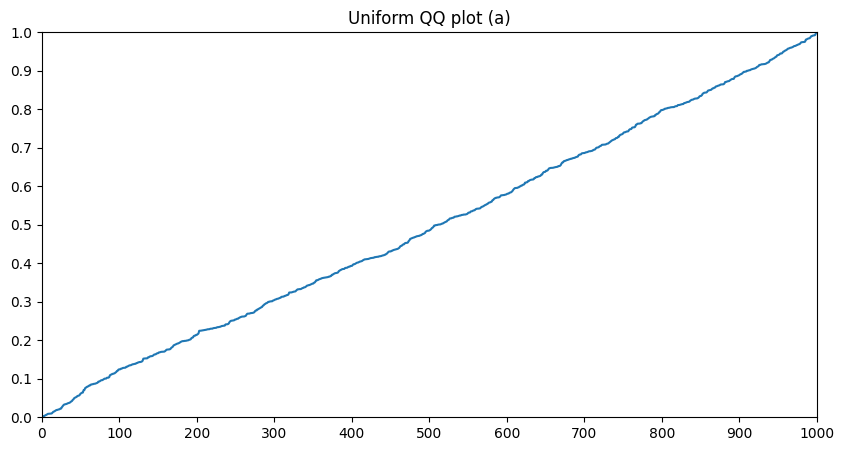

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(expected_quantiles, sorted_sequence)
plt.xlim(0, 1000)  
plt.ylim(0, 1)  
plt.title("Uniform QQ plot (a)")  
xticks = np.arange(0, 1001, 100)
plt.xticks(xticks)
yticks = np.arange(0, 1.1, 0.1)
plt.yticks(yticks)
plt.show()

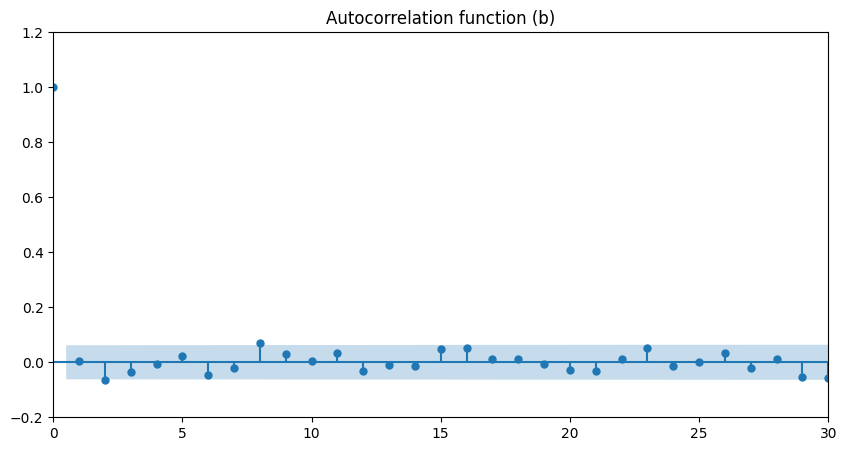

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(np.array(sequence), ax = ax)
plt.xlim(0, 30)  
plt.ylim(-0.2, 1.2)
plt.title("Autocorrelation function (b)")  
xticks = np.arange(0, 31, 5)
plt.xticks(xticks)
yticks = np.arange(-0.20, 1.3, 0.2)
plt.yticks(yticks)
plt.show()

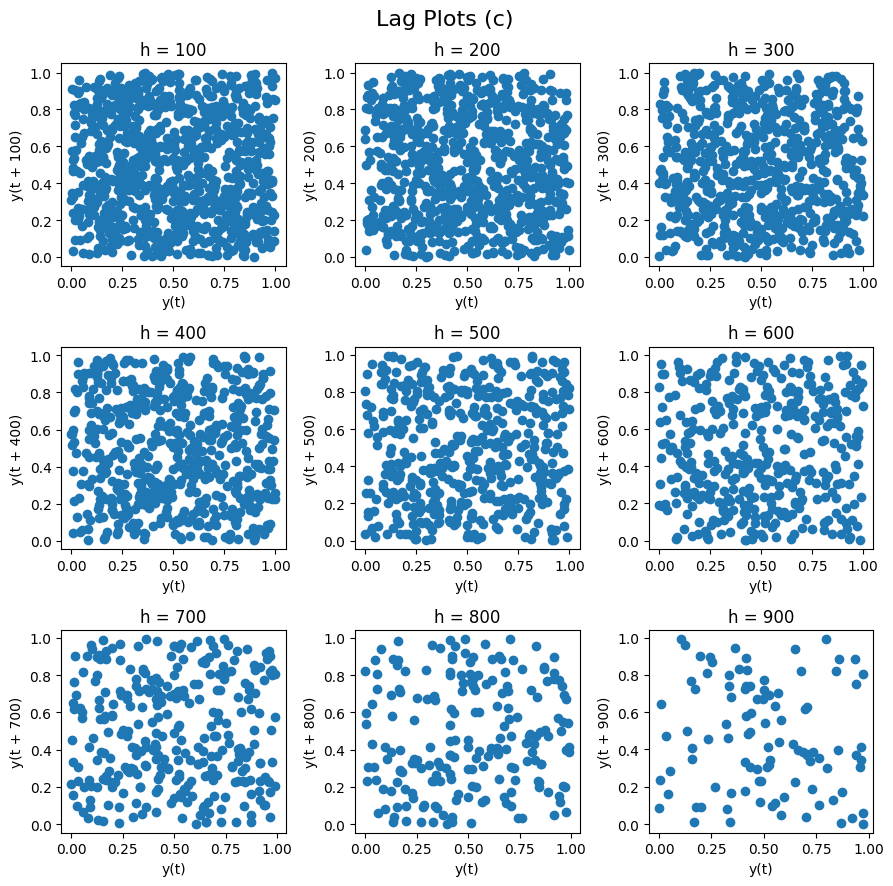

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))

for i, lag in enumerate(range(100, 901, 100)):
    ax = axes.flat[i]
    pd.plotting.lag_plot(pd.Series(sequence), lag=lag, ax=ax)
    ax.set_title(f'h = {lag}')

fig.suptitle("Lag Plots (c)", fontsize=16)
plt.tight_layout()
plt.show()

**<span style="font-size: 95%;"> Fig. 6.7</span>**

In [8]:
seed1 = 1
seed2 = 2
num_points = 1000
sequence1 = linear_congruence(seed1, a, m, num_points)
sequence2 = linear_congruence(seed2, a, m, num_points)

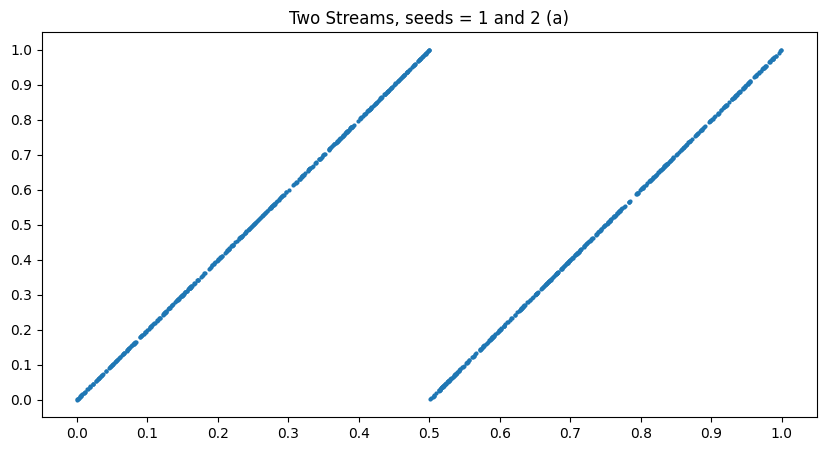

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(sequence1, sequence2, 'o', markersize=2)
xticks = np.arange(0, 1.1, 0.1)
plt.xticks(xticks)
yticks = np.arange(0, 1.1, 0.1)
plt.yticks(yticks)
plt.title('Two Streams, seeds = 1 and 2 (a)')
plt.show()

In [10]:
sequence3 = linear_congruence(sequence1[-1], a, m, num_points)
sequence1[-1]

0.2432285017535223

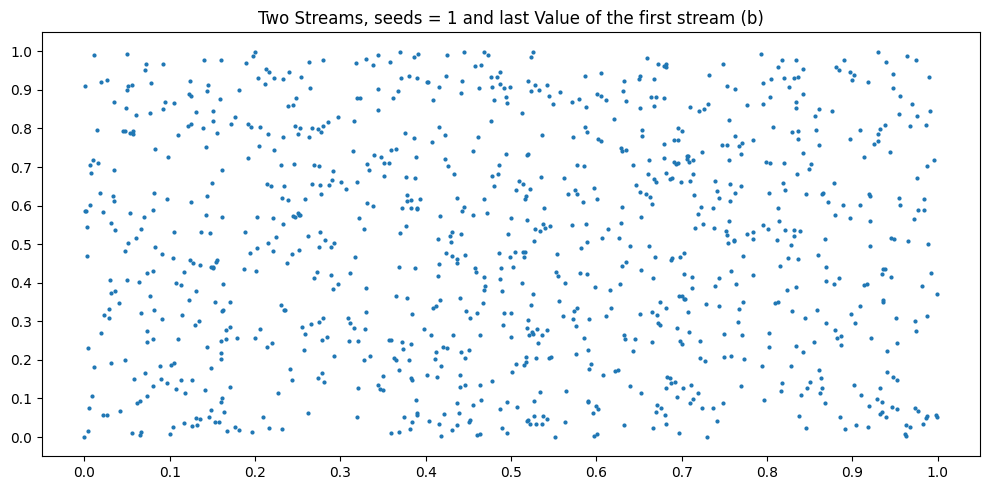

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(sequence1, sequence3, 'o', markersize=2)
plt.title('Two Streams, seeds = 1 and last Value of the first stream (b)')
xticks = np.arange(0, 1.1, 0.1)
plt.xticks(xticks)
yticks = np.arange(0, 1.1, 0.1)
plt.yticks(yticks)
plt.tight_layout()
plt.show()

**<span style="font-size: 95%;"> Fig. 6.10</span>**

In [12]:
a = 10
num_samples = 2000
np.random.seed(1234)

In [13]:
def density_function(x):
    return np.sin(x)**2 / x**2

In [14]:
samples = np.random.choice(np.linspace(-a, a, num_samples), size=2000, p = density_function(np.linspace(-a, a, num_samples)) / np.sum(density_function(np.linspace(-a, a, num_samples))))
bin_size = 1000
x = np.linspace(-a, a, 2000)
y = density_function(x)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


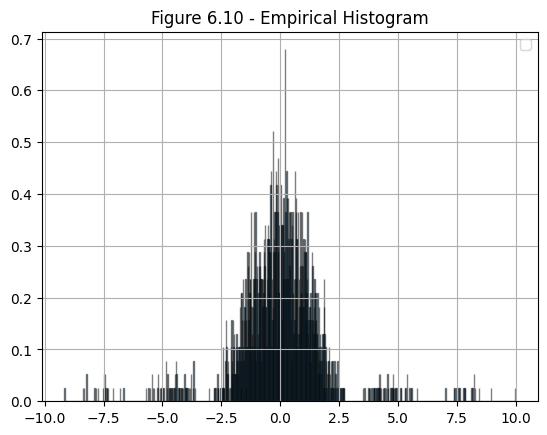

In [15]:
plt.hist(samples, bins=bin_size, density=True, alpha=0.5, edgecolor='black')
plt.title('Figure 6.10 - Empirical Histogram')
plt.legend()
plt.grid(True)
plt.show()


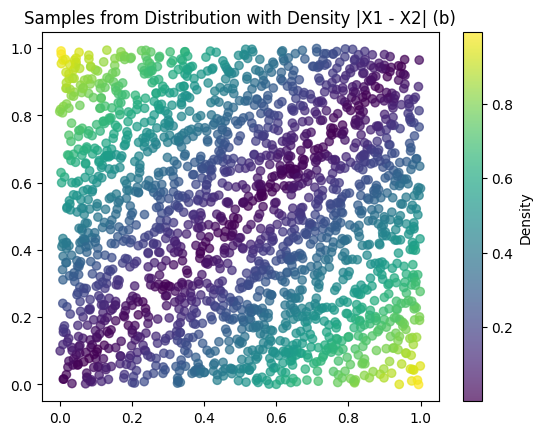

In [16]:
x1 = np.random.uniform(low=0, high=1, size=num_samples)
x2 = np.random.uniform(low=0, high=1, size=num_samples)

weights = np.abs(x1 - x2)

plt.scatter(x1, x2, c=weights, cmap='viridis', alpha=0.7)
plt.colorbar(label='Density')
plt.title('Samples from Distribution with Density |X1 - X2| (b)')
plt.show()

**<span style="font-size: 100%;"> Q2) Binomial R.V.</span>**

In [17]:
def binomial_cdf_inv(n, p, size):
    q = 1 - p
    s = np.zeros(size)
    for i in range(size):
        u = np.random.uniform(0, 1)
        j = 0
        F = (1 - q**n) / (1 - q)
        while u > F:
            j += 1
            F += (p**j * q**(n-j) * (n-j+1)) / (j * (1-q))
        s[i] = j
    return s

In [18]:
def binomial_bernoulli_var(n, p, size):
    s = np.zeros(size)
    for i in range(size):
        s[i] = np.sum(np.random.binomial(1, p, n))
    return s

In [19]:
def binomial_geo_strings(n, p, size):
    s = np.zeros(size)
    for i in range(size):
        u = np.random.uniform(0, 1, n)
        x = np.zeros(n)
        x[u <= p] = 1
        s[i] = np.sum(x)
    return s

In [20]:
n_values = [10, 50, 100, 500]
p_values = [0.1, 0.5, 0.9]
sizes = [100000]
counter = 1
results = []

In [21]:
# counter = 1
# for n in n_values:
#     for p in p_values:
#         for size in sizes:
#             print("Round " +str(counter)+ ": ")
#             start_time = time.time()
#             binomial_cdf_inv(n, p, size)
#             end_time = time.time()
#             print(f"CDF inversion method for n={n}, p={p}: {end_time - start_time:.6f} seconds")
            
#             start_time = time.time()
#             binomial_bernoulli_var(n, p, size)
#             end_time = time.time()
#             print(f"Bernoulli sequence method for n={n}, p={p}: {end_time - start_time:.6f} seconds")
            
#             start_time = time.time()
#             binomial_geo_strings(n, p, size)
#             end_time = time.time()
#             print(f"Geometric string method for n={n}, p={p}: {end_time - start_time:.6f} seconds")
#             print()
#             counter = counter + 1

In [22]:
for n in n_values:
    for p in p_values:
        for size in sizes:
            row = []
            row.append("n = " + str(n))
            row.append("p = " + str(p))

            start_time = time.time()
            binomial_cdf_inv(n, p, size)
            end_time = time.time()
            row.append(f"{end_time - start_time:.6f}")

            start_time = time.time()
            binomial_bernoulli_var(n, p, size)
            end_time = time.time()
            row.append(f"{end_time - start_time:.6f}")

            start_time = time.time()
            binomial_geo_strings(n, p, size)
            end_time = time.time()
            row.append(f"{end_time - start_time:.6f}")

            results.append(row)

table_headers = ["n", "p", "CDF inversion method", "Bernoulli sequence method", "Geometric string method"]
print(tabulate(results, headers=table_headers, tablefmt="grid"))

+---------+---------+------------------------+-----------------------------+---------------------------+
| n       | p       |   CDF inversion method |   Bernoulli sequence method |   Geometric string method |
+=========+=========+========================+=============================+===========================+
| n = 10  | p = 0.1 |               0.19876  |                    0.37627  |                  0.659343 |
+---------+---------+------------------------+-----------------------------+---------------------------+
| n = 10  | p = 0.5 |               0.186079 |                    0.386707 |                  0.704808 |
+---------+---------+------------------------+-----------------------------+---------------------------+
| n = 10  | p = 0.9 |               0.199105 |                    0.386879 |                  0.646687 |
+---------+---------+------------------------+-----------------------------+---------------------------+
| n = 50  | p = 0.1 |               0.200375 |         

**<span style="font-size: 100%;"> Q3) Poisson R.V.</span>**

In [23]:
def poisson_cdf_inversion(l):
    L = np.exp(-l)
    k = 0
    p = 1
    while True:
        k += 1
        u = np.random.uniform(0, 1)
        p *= u
        if p < L:
            return k - 1

In [24]:
def poisson_exponential(l):
    x = 0
    s = 0
    while s < l:
        u = np.random.uniform(0, 1)
        s -= np.log(u)
        if s < l:
            x += 1
    return x

In [25]:
def poisson_uniform(l):
    x = 0
    p = np.exp(-l)
    while True:
        u = np.random.uniform(0, 1)
        p *= u
        if p >= 1:
            x += 1
            p /= 1
        else:
            return x

In [26]:
# lambdas = [1, 5, 10, 20, 30]
# n = 100000

# for l in lambdas:
#     print("Lambda: " + str(l))
#     start_time = time.time()
#     samples = [poisson_cdf_inversion(l) for i in range(n)]
#     end_time = time.time()
#     print(f"CDF inversion: time = {end_time - start_time:.4f} seconds")

#     start_time = time.time()
#     samples = [poisson_exponential(l) for i in range(n)]
#     end_time = time.time()
#     print(f"Exponential sum: time = {end_time - start_time:.4f} seconds")

#     start_time = time.time()
#     samples = [poisson_uniform(l) for i in range(n)]
#     end_time = time.time()
#     print(f"Uniform product: time = {end_time - start_time:.4f} seconds")
#     print()

In [27]:
lambdas = [1, 5, 10, 20, 30]
n = 100000
results = []

for l in lambdas:
    row = []
    row.append("Lambda = " + str(l))

    start_time = time.time()
    samples = [poisson_cdf_inversion(l) for i in range(n)]
    end_time = time.time()
    row.append(f"{end_time - start_time:.4f}")

    start_time = time.time()
    samples = [poisson_exponential(l) for i in range(n)]
    end_time = time.time()
    row.append(f"{end_time - start_time:.4f}")

    start_time = time.time()
    samples = [poisson_uniform(l) for i in range(n)]
    end_time = time.time()
    row.append(f"{end_time - start_time:.4f}")

    results.append(row)

table_headers = ["Lambda", "CDF inversion", "Exponential sum", "Uniform product"]
print(tabulate(results, headers=table_headers, tablefmt="grid"))

+-------------+-----------------+-------------------+-------------------+
| Lambda      |   CDF inversion |   Exponential sum |   Uniform product |
+=============+=================+===================+===================+
| Lambda = 1  |          0.425  |            0.4647 |            0.3129 |
+-------------+-----------------+-------------------+-------------------+
| Lambda = 5  |          1.0855 |            1.39   |            0.286  |
+-------------+-----------------+-------------------+-------------------+
| Lambda = 10 |          1.9432 |            2.5486 |            0.2792 |
+-------------+-----------------+-------------------+-------------------+
| Lambda = 20 |          3.6087 |            4.8198 |            0.2626 |
+-------------+-----------------+-------------------+-------------------+
| Lambda = 30 |          5.5294 |            7.4457 |            0.3264 |
+-------------+-----------------+-------------------+-------------------+


**<span style="font-size: 100%;"> Q4) 2 LCG's</span>**

In [28]:
def lcg(a, m, seed):
    while True:
        seed = (a * seed) % m
        yield seed / m

In [29]:
def find_period(lcg_func, max_iterations=10_000):
    seen_values = {}
    value = next(lcg_func)
    for i in range(max_iterations):
        if value in seen_values:
            period = i - seen_values[value]
            full_period = (period == max_iterations)
            return period, full_period
        seen_values[value] = i
        value = next(lcg_func)
    return -1, False


In [30]:
def check_lcg_full_period(lcg_generator, m):
    state_set = set()
    iteration_count = 0
    full_period = False

    for value in lcg_generator:
        int_value = int(value * m)

        if int_value in state_set:
            if full_period:
                break
            else:
                full_period = True

        state_set.add(int_value)
        iteration_count += 1

    if full_period:
        print("LCG is full period.")
    else:
        print("LCG is not full period.")


In [31]:
a1 = 18
m1 = 101
lcg1 = lcg(a1, m1, seed)

In [32]:
a2 = 2
m2 = 101
lcg2 = lcg(a2, m2, seed)

In [33]:
check_lcg_full_period(lcg1, m1)

LCG is full period.


In [34]:
check_lcg_full_period(lcg2, m2)

LCG is full period.


In [35]:
lcg_list1 = [next(lcg1) for _ in range(100)]
lcg_list2 = [next(lcg2) for _ in range(100)]

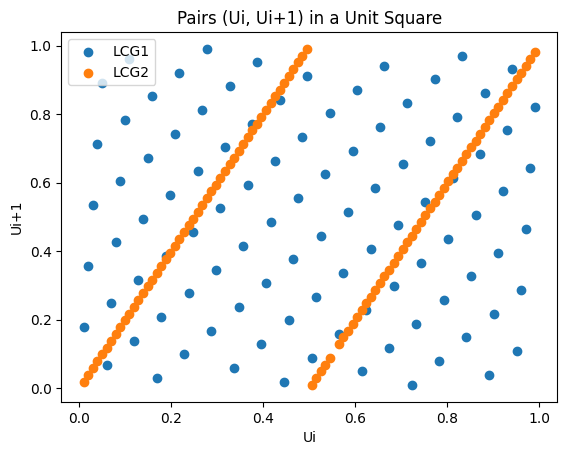

In [36]:
plt.scatter(lcg_list1[:-1], lcg_list1[1:], label='LCG1')
plt.scatter(lcg_list2[:-1], lcg_list2[1:], label='LCG2')
plt.xlabel('Ui')
plt.ylabel('Ui+1')
plt.title('Pairs (Ui, Ui+1) in a Unit Square')
plt.legend()
plt.show()

**<span style="font-size: 100%;"> Q5) LCG with a = 65539, m = 2^31</span>**

In [37]:
a = 65539
m = 2**31

In [38]:
lcg = lcg(a, m, seed)
u = [next(lcg) for _ in range(100)]

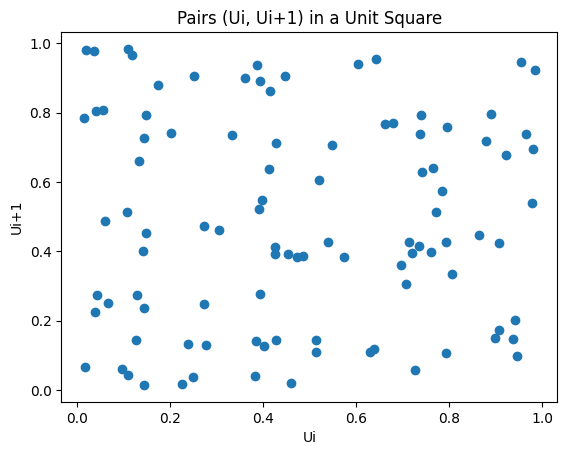

In [39]:
fig, ax = plt.subplots()
ax.scatter(u[:-1], u[1:])
ax.set_xlabel('Ui')
ax.set_ylabel('Ui+1')
ax.set_title('Pairs (Ui, Ui+1) in a Unit Square')
plt.show()

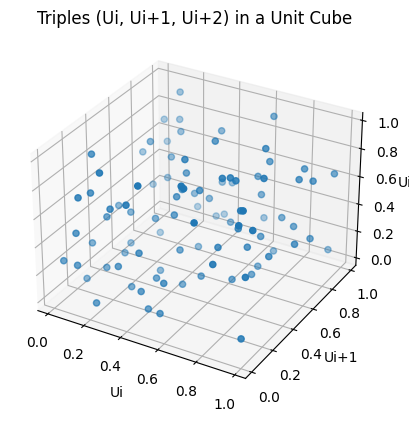

In [40]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(u[:-2], u[1:-1], u[2:])
ax.set_xlabel('Ui')
ax.set_ylabel('Ui+1')
ax.set_zlabel('Ui+2')
ax.set_title('Triples (Ui, Ui+1, Ui+2) in a Unit Cube')
plt.show()